In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Balancing using SMOTE

In [2]:
# pip install -U imbalanced-learn

In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load dataset
dataset_path = '/content/drive/MyDrive/CAPSTONE/mw1.csv'
mw1_data = pd.read_csv(dataset_path)

# Preprocess data
X = mw1_data.drop(columns=["Defective"])
y = mw1_data["Defective"]

# Handle missing values
X.replace('?', np.nan, inplace=True)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Display class distribution before balancing
print("Class distribution before balancing:", Counter(y))

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# Display class distribution after balancing
print("Class distribution after balancing:", Counter(y_resampled))

# Save balanced dataset to a new file
balanced_mw1_smote = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=["Defective"])], axis=1)
balanced_mw1_smote.to_csv("/content/drive/MyDrive/CAPSTONE/balanced_mw1_SMOTE.csv", index=False)


Class distribution before balancing: Counter({'N': 372, 'Y': 31})
Class distribution after balancing: Counter({'N': 372, 'Y': 372})


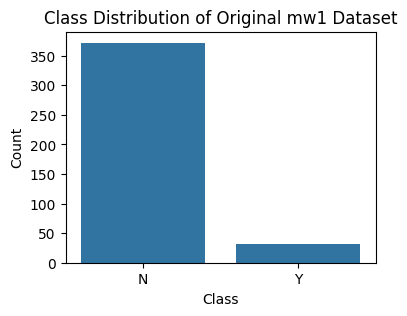

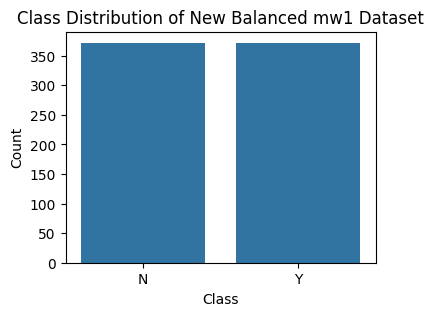

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the original mw1 dataset
original_mw1_data = pd.read_csv("/content/drive/MyDrive/CAPSTONE/mw1.csv")

# Load the new balanced mw1 dataset
new_mw1_data = pd.read_csv("/content/drive/MyDrive/CAPSTONE/balanced_mw1_GAN.csv")

# Plot the class distribution of the original mw1 dataset
plt.figure(figsize=(4, 3))
sns.countplot(x='Defective', data=original_mw1_data)
plt.title('Class Distribution of Original mw1 Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['N', 'Y'])
plt.show()

# Plot the class distribution of the new balanced mw1 dataset
plt.figure(figsize=(4, 3))
sns.countplot(x='Defective', data=new_mw1_data)
plt.title('Class Distribution of New Balanced mw1 Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['N', 'Y'])
plt.show()

ML model training on SMOTE Balanced MW1 dataset

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.impute import SimpleImputer

# Load dataset
dataset_path = '/content/drive/MyDrive/CAPSTONE/balanced_mw1_GAN.csv'
balanced_mw1_GAN_data = pd.read_csv(dataset_path)

In [6]:
# Replace '?' with NaN
balanced_mw1_GAN_data.replace('?', np.nan, inplace=True)

# Preprocess data
X = balanced_mw1_GAN_data.drop(columns=["Defective"])
y = balanced_mw1_GAN_data["Defective"]

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random forest classifier

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
classification_report_rf = classification_report(y_test, y_pred_rf)

print("Metrics for Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print("Classification Report:")
print(classification_report_rf)

Metrics for Random Forest Classifier:
Accuracy: 0.9328859060402684
Precision: 0.9377319384129491
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94        77
         1.0       0.98      0.88      0.93        72

    accuracy                           0.93       149
   macro avg       0.94      0.93      0.93       149
weighted avg       0.94      0.93      0.93       149



Support Vector Machine (SVM)

In [8]:
from sklearn.svm import SVC

# Train SVM Classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
classification_report_svm = classification_report(y_test, y_pred_svm)

print("Metrics for SVM Classifier:")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print("Classification Report:")
print(classification_report_svm)

Metrics for SVM Classifier:
Accuracy: 0.9328859060402684
Precision: 0.9340215330477206
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94        77
         1.0       0.96      0.90      0.93        72

    accuracy                           0.93       149
   macro avg       0.93      0.93      0.93       149
weighted avg       0.93      0.93      0.93       149



Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_classifier.predict(X_test)

# Evaluate model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')
classification_report_logistic = classification_report(y_test, y_pred_logistic)

print("Metrics for Logistic Regression:")
print(f"Accuracy: {accuracy_logistic}")
print(f"Precision: {precision_logistic}")
print("Classification Report:")
print(classification_report_logistic)

Metrics for Logistic Regression:
Accuracy: 0.9463087248322147
Precision: 0.9463087248322147
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        77
         1.0       0.94      0.94      0.94        72

    accuracy                           0.95       149
   macro avg       0.95      0.95      0.95       149
weighted avg       0.95      0.95      0.95       149



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


K-Nearest Neighbors (KNN)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
classification_report_knn = classification_report(y_test, y_pred_knn)

print("Metrics for KNN Classifier:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print("Classification Report:")
print(classification_report_knn)

Metrics for KNN Classifier:
Accuracy: 0.9395973154362416
Precision: 0.9459185266115188
Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.94        77
         1.0       1.00      0.88      0.93        72

    accuracy                           0.94       149
   macro avg       0.95      0.94      0.94       149
weighted avg       0.95      0.94      0.94       149



Gradient Boosting

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_classifier.predict(X_test)

# Evaluate model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
classification_report_gb = classification_report(y_test, y_pred_gb)

print("Metrics for Gradient Boosting Classifier:")
print(f"Accuracy: {accuracy_gb}")
print(f"Precision: {precision_gb}")
print("Classification Report:")
print(classification_report_gb)

Metrics for Gradient Boosting Classifier:
Accuracy: 0.9530201342281879
Precision: 0.9569351230425055
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        77
         1.0       1.00      0.90      0.95        72

    accuracy                           0.95       149
   macro avg       0.96      0.95      0.95       149
weighted avg       0.96      0.95      0.95       149



Comparison Between models

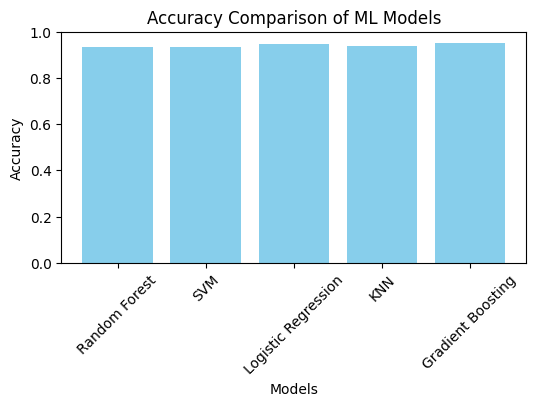

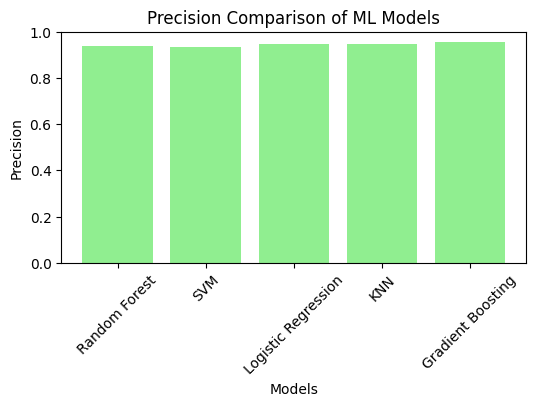

In [12]:
import matplotlib.pyplot as plt

# Metrics for each model
models = ['Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_svm, accuracy_logistic, accuracy_knn, accuracy_gb]
precisions = [precision_rf, precision_svm, precision_logistic, precision_knn, precision_gb]

# Plotting accuracy
plt.figure(figsize=(6, 3))
plt.bar(models, accuracies, color='skyblue')
plt.title('Accuracy Comparison of ML Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

# Plotting precision
plt.figure(figsize=(6, 3))
plt.bar(models, precisions, color='lightgreen')
plt.title('Precision Comparison of ML Models')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.show()

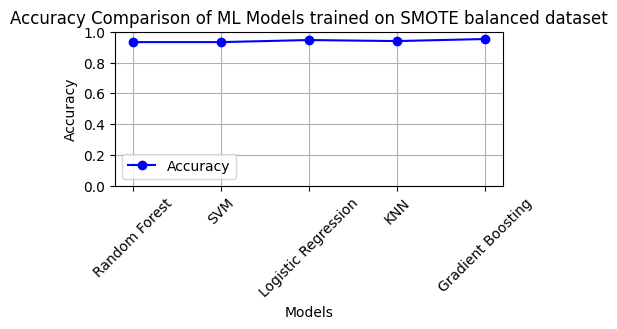

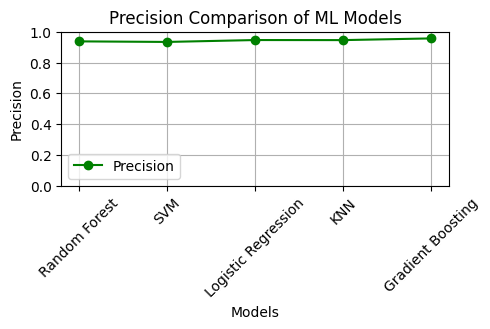

In [13]:
import matplotlib.pyplot as plt

# Metrics for each model
models = ['Random Forest', 'SVM', 'Logistic Regression', 'KNN', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_svm, accuracy_logistic, accuracy_knn, accuracy_gb]
precisions = [precision_rf, precision_svm, precision_logistic, precision_knn, precision_gb]

# Plotting accuracy
plt.figure(figsize=(5, 2))
plt.plot(models, accuracies, marker='o', color='blue', label='Accuracy')
plt.title('Accuracy Comparison of ML Models trained on SMOTE balanced dataset')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Plotting precision
plt.figure(figsize=(5, 2))
plt.plot(models, precisions, marker='o', color='green', label='Precision')
plt.title('Precision Comparison of ML Models')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()